In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [2]:
hdata = pd.read_excel('heart_disease.xlsx')
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [3]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [4]:
hdata.shape

(303, 14)

In [5]:
hdata.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
5,57.0,1.0,0.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
6,56.0,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0,1.0
7,44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0
8,52.0,1.0,2.0,172.0,199.0,1.0,1.0,162.0,0.0,0.5,2.0,0.0,3.0,1.0
9,57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0


In [6]:
list(zip(hdata.columns, [i for i in hdata.dtypes]))

[('age', dtype('float64')),
 ('sex', dtype('float64')),
 ('cp', dtype('float64')),
 ('trestbps', dtype('float64')),
 ('chol', dtype('float64')),
 ('fbs', dtype('float64')),
 ('restecg', dtype('float64')),
 ('thalach', dtype('float64')),
 ('exang', dtype('float64')),
 ('oldpeak', dtype('float64')),
 ('slope', dtype('float64')),
 ('ca', dtype('float64')),
 ('thal', dtype('float64')),
 ('target', dtype('float64'))]

In [10]:
# Колонки с пропусками
hcols_with_na = [c for c in hdata.columns if hdata[c].isnull().sum() < 0]
hcols_with_na

[]

In [9]:
# Количество пропусков
[(c, hdata[c].isnull().sum()) for c in hcols_with_na]

[]

In [11]:
# Доля (процент) пропусков
[(c, hdata[c].isnull().mean()) for c in hcols_with_na]

[]

In [12]:
# Колонки для которых удаляются пропуски
hcols_with_na_temp = ['age', 'sex', 'trestbps', 'target']

In [13]:
# Удаление пропусков
hdata_drop = hdata[hcols_with_na_temp].dropna()
hdata_drop.shape

(303, 4)

In [14]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green', figsize=(15, 8))
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5, figsize=(15, 8))


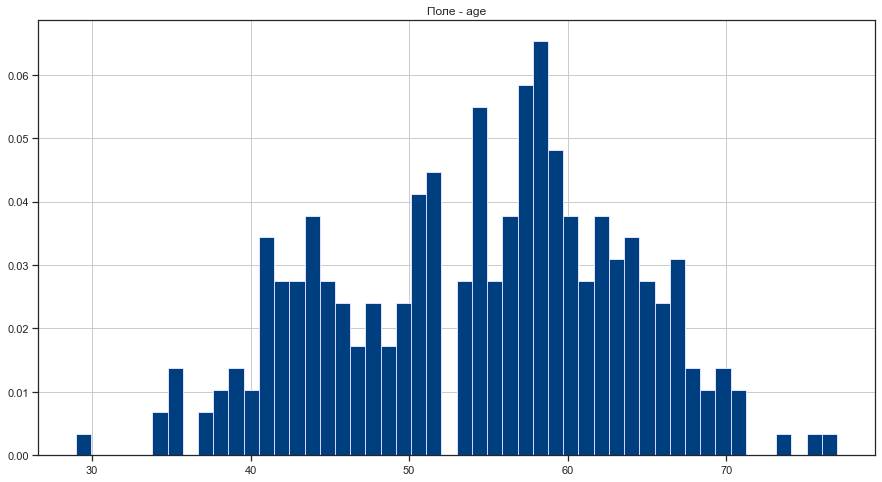

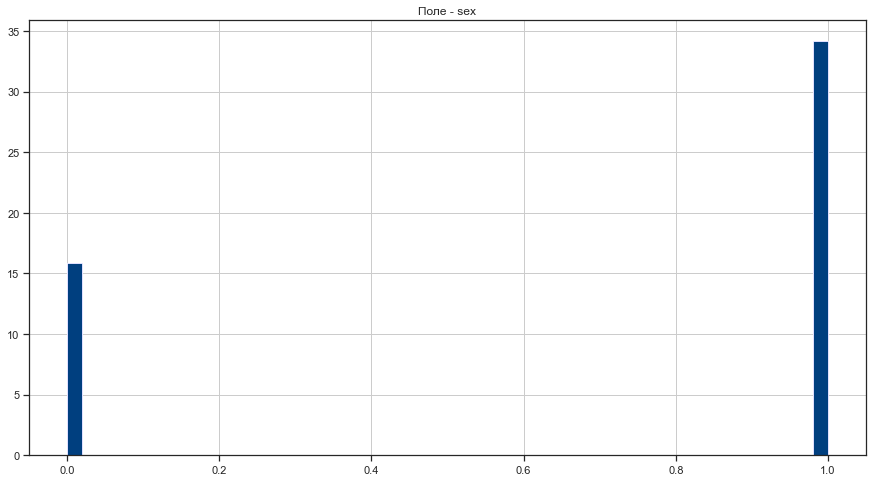

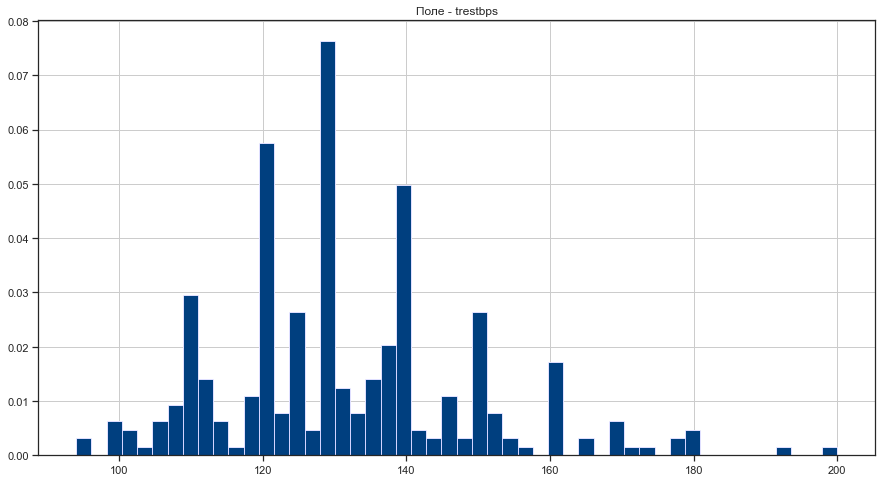

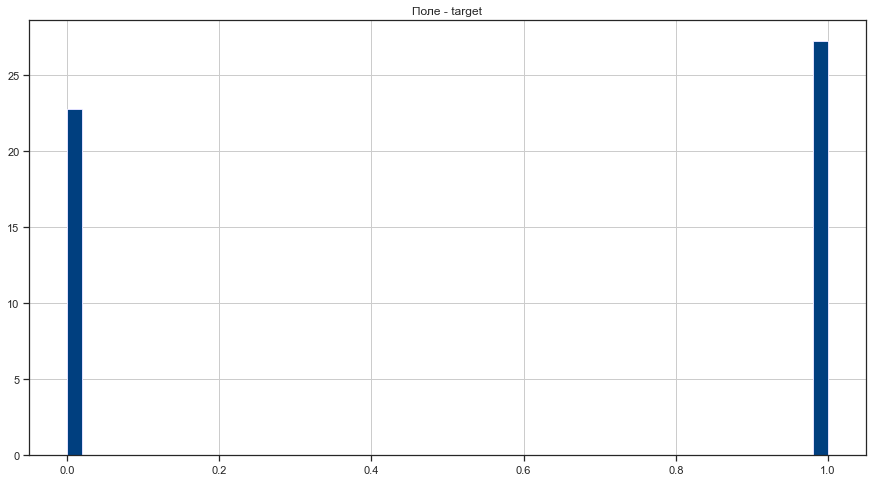

In [15]:
plot_hist_diff(hdata, hdata_drop, hcols_with_na_temp)

In [16]:
# Пример работы MissingIndicator
temp_x1 = np.array([[np.nan, 1, 3], [4, 0, np.nan], [8, 1, 0]])
print('Исходный массив:')
print(temp_x1)
indicator = MissingIndicator()
temp_x1_transformed = indicator.fit_transform(temp_x1)
print('Маска пропущенных значений:')
print(temp_x1_transformed)

Исходный массив:
[[nan  1.  3.]
 [ 4.  0. nan]
 [ 8.  1.  0.]]
Маска пропущенных значений:
[[ True False]
 [False  True]
 [False False]]


In [17]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [29]:
all_data, filled_data, missed_data = impute_column(hdata, 'thalach', 'mean')
all_data

array([150., 187., 172., 178., 163., 148., 153., 173., 162., 174., 160.,
       139., 171., 144., 162., 158., 172., 114., 171., 151., 161., 179.,
       178., 137., 178., 162., 157., 123., 157., 152., 168., 140., 188.,
       152., 125., 160., 170., 165., 148., 151., 142., 180., 148., 143.,
       182., 172., 180., 156., 115., 160., 149., 151., 146., 175., 172.,
       158., 186., 185., 174., 159., 130., 156., 190., 132., 165., 182.,
       143., 175., 170., 163., 147., 154., 202., 186., 165., 161., 166.,
       164., 184., 154., 179., 170., 160., 178., 122., 160., 151., 156.,
       158., 122., 175., 168., 169., 159., 138., 111., 157., 147., 162.,
       173., 178., 145., 179., 194., 163., 115., 131., 152., 162., 159.,
       154., 173., 133., 161., 155., 170., 168., 162., 172., 152., 122.,
       182., 172., 167., 179., 192., 143., 172., 169., 121., 163., 162.,
       162., 153., 163., 163.,  96., 140., 126., 105., 157., 181., 173.,
       142., 116., 143., 149., 171., 169., 150., 13

In [30]:
filled_data

array([], dtype=float64)

In [31]:
missed_data

array([], dtype=float64)

In [32]:
def research_impute_numeric_column(dataset, num_column, const_value=None):
    strategy_params = ['mean', 'median', 'most_frequent', 'constant']
    strategy_params_names = ['Среднее', 'Медиана', 'Мода']
    strategy_params_names.append('Константа = ' + str(const_value))
    
    original_temp_data = dataset[[num_column]].values
    size = original_temp_data.shape[0]
    original_data = original_temp_data.reshape((size,))
    
    new_df = pd.DataFrame({'Исходные данные':original_data})
       
    for i in range(len(strategy_params)):
        strategy = strategy_params[i]
        col_name = strategy_params_names[i]
        if (strategy!='constant') or (strategy == 'constant' and const_value!=None):
            if strategy == 'constant':
                temp_data, _, _ = impute_column(dataset, num_column, strategy, fill_value_param=const_value)
            else:
                temp_data, _, _ = impute_column(dataset, num_column, strategy)
            new_df[col_name] = temp_data
        
    sns.kdeplot(data=new_df)

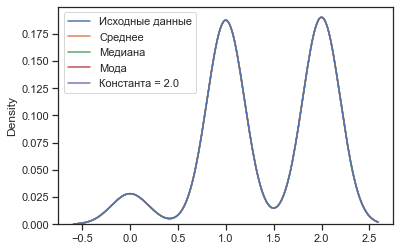

In [33]:
research_impute_numeric_column(hdata, 'slope',2.0)

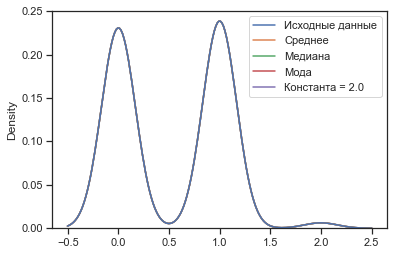

In [35]:
research_impute_numeric_column(hdata, 'restecg',2.0)

In [36]:
# Похоже на нормальное
slope_ev = hdata['slope'].mean() + 3*hdata['slope'].std()
slope_ev

3.248018370031289

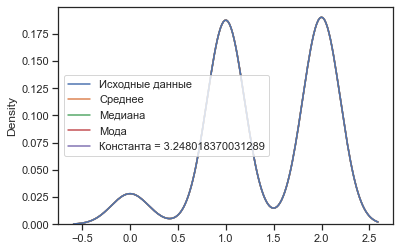

In [38]:
research_impute_numeric_column(hdata, 'slope', slope_ev)

In [40]:
# Ассиметричное
IQR = hdata['trestbps'].quantile(0.75) - hdata['trestbps'].quantile(0.25)
MaxTres_ev1 = hdata['trestbps'].quantile(0.75) + 3*IQR
print('IQR={}, extreme_value={}'.format(IQR, MaxTres_ev1))

IQR=20.0, extreme_value=200.0


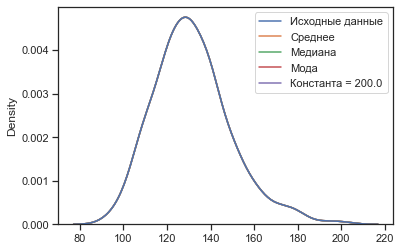

In [42]:
research_impute_numeric_column(hdata, 'trestbps', MaxTres_ev1)

In [45]:
IQR_lf = hdata['thalach'].quantile(0.75) - hdata['thalach'].quantile(0.25)
thalach_ev1 = hdata['thalach'].quantile(0.75) + 1.5*IQR_lf
thalach_ev2 = hdata['thalach'].quantile(0.75) + 3*IQR_lf

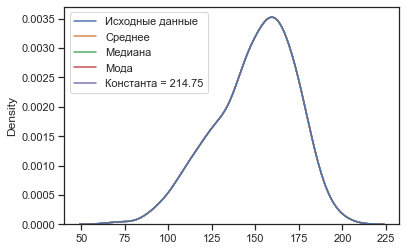

In [47]:
research_impute_numeric_column(hdata, 'thalach', thalach_ev1)

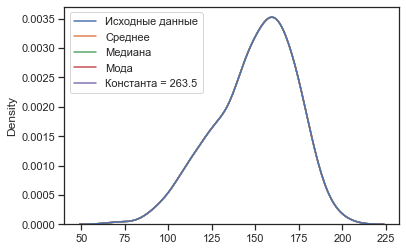

In [48]:
research_impute_numeric_column(hdata, 'thalach', thalach_ev2)

In [51]:
# 'Unmarried',
hdata_cat_cols = ['thal', 'restecg']
hdata_cat_new = hdata[hdata_cat_cols].copy() 

In [52]:
PoolQC_cat_new_temp, _, _ = impute_column(hdata_cat_new, 'thal', 'most_frequent')
Fence_cat_new_temp, _, _ = impute_column(hdata_cat_new, 'restecg', 'most_frequent')

In [53]:
hdata_cat_new['thal'] = PoolQC_cat_new_temp
hdata_cat_new['restecg'] = Fence_cat_new_temp

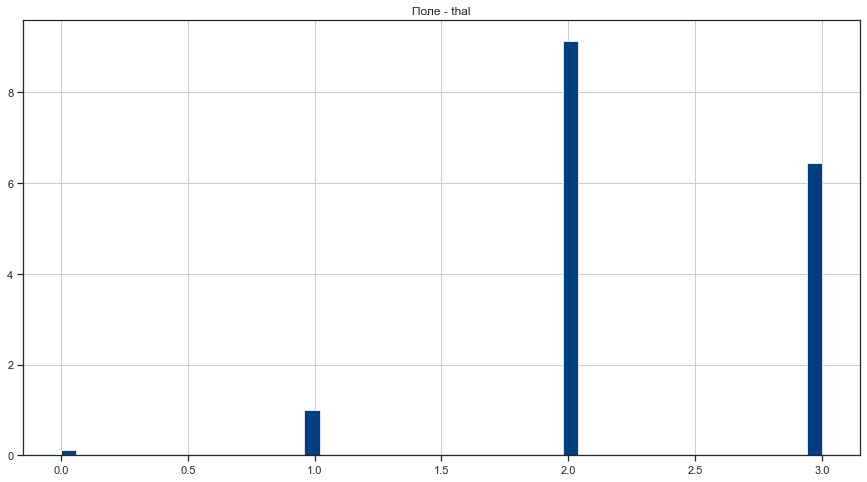

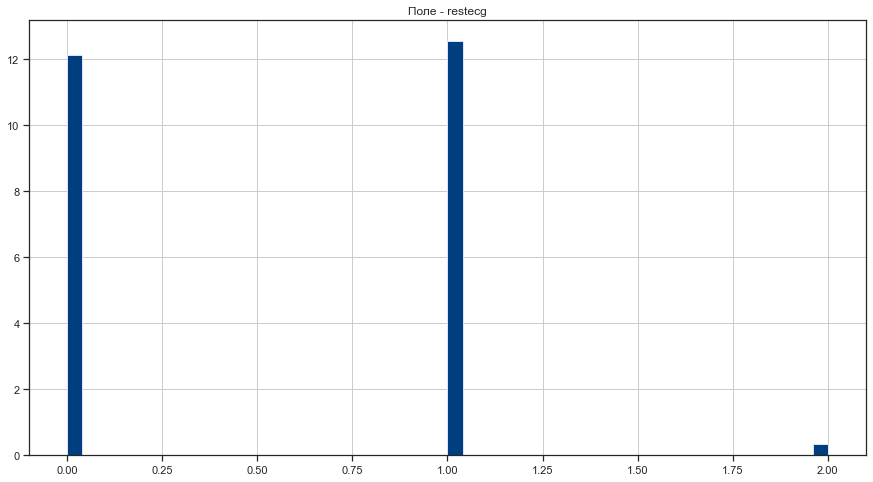

In [54]:
plot_hist_diff(hdata, hdata_cat_new, hdata_cat_cols)

In [55]:
hdata_cat_cols = ['thal', 'restecg']
hdata_cat_na = hdata[hdata_cat_cols].copy().astype('object')
hdata_cat_na = hdata_cat_na.replace({np.nan:'NA',0:'False',1:'True'})
hdata_cat_na.head()

,thal,restecg
0,True,False
1,2.0,True
2,2.0,False
3,2.0,True
4,2.0,True


In [56]:
# 'Waist', 'Unmarried', 'PoorVision'
PoolQC_cat_na_temp, _, _ = impute_column(hdata_cat_na, 'thal', 'constant', fill_value_param='NA')
Fence_cat_na_temp, _, _ = impute_column(hdata_cat_na, 'restecg', 'constant', fill_value_param='NA')

In [57]:
hdata_cat_na['thal'] = PoolQC_cat_na_temp
hdata_cat_na['restecg'] = Fence_cat_na_temp

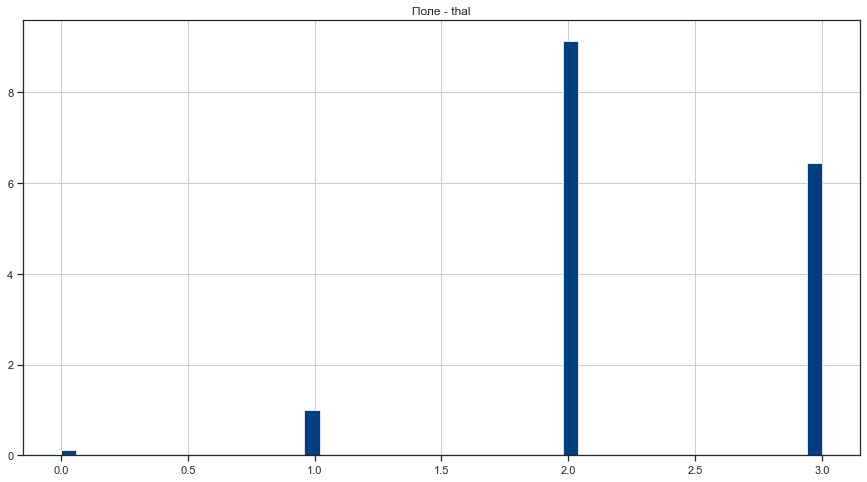

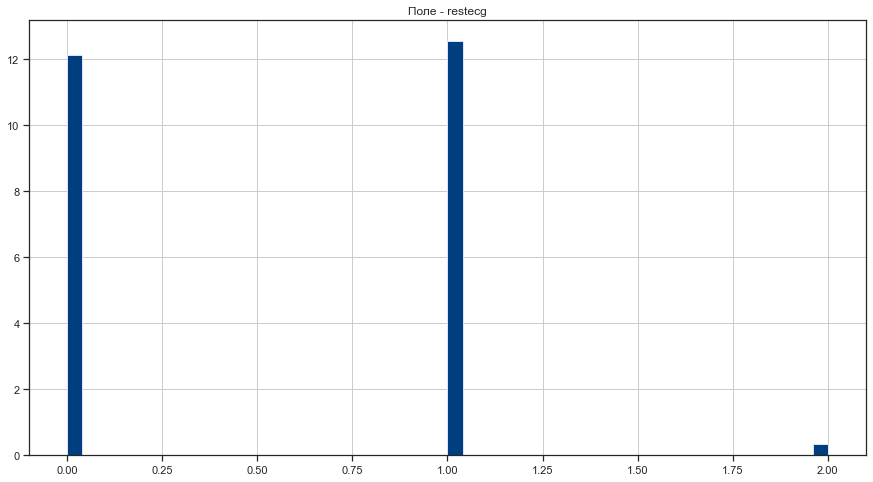

In [60]:
plot_hist_diff(hdata, hdata_cat_new, hdata_cat_cols)

In [62]:
hdata_mis = hdata[['chol']].copy()
hdata_mis.head(10)

,chol
0,233.0
1,250.0
2,204.0
3,236.0
4,354.0
5,192.0
6,294.0
7,263.0
8,199.0
9,168.0


In [63]:
indicator = MissingIndicator()
PoolQC_missing = indicator.fit_transform(hdata_mis[['chol']])
PoolQC_missing

array([], shape=(303, 0), dtype=bool)

In [64]:
PoolQC_missing_int = [1 if i==True else 0 for i in PoolQC_missing]
PoolQC_missing_int[:10]

C:\Users\twai1\AppData\Local\Temp\ipykernel_5384\1375431849.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  PoolQC_missing_int = [1 if i==True else 0 for i in PoolQC_missing]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [65]:
hdata_mis['chol_missing'] = PoolQC_missing_int
hdata_mis.head()

,chol,chol_missing
0,233.0,0
1,250.0,0
2,204.0,0
3,236.0,0
4,354.0,0


In [77]:
pipe = Pipeline(steps=[
    ('imputer', KNNImputer(
        n_neighbors=5,
        weights='distance',
        add_indicator=False)),
    ('scaler', StandardScaler()),
    ('regressor', Lasso(max_iter=2000)),
])

In [74]:
param_grid = {
    'imputer__n_neighbors': [4,5,6],
    'imputer__weights': ['uniform', 'distance'],
    'imputer__add_indicator': [True, False],
    'regressor__alpha': [10, 100, 200],
}

In [75]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='r2')

In [79]:
grid_search.fit(knnimpute_hdata, knn_hdata['Source of Care'])

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'